### matplotlib: basic plotting likes bars, lines, scatter, histogram plots
### seaborn: Statistic visualization 

In [2]:
!pip install seaborn

In [4]:
# import model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# đảm bảo ảnh của seaborn và plt luôn năm trong jupyter lab
%matplotlib inline 

In [7]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


### Styling 

In [39]:
sns.set_theme() #Apply the default theme 

### Distribution plot
* Univariate distribution of observations

In [16]:
tip_df = sns.load_dataset('tips')

In [17]:
tip_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


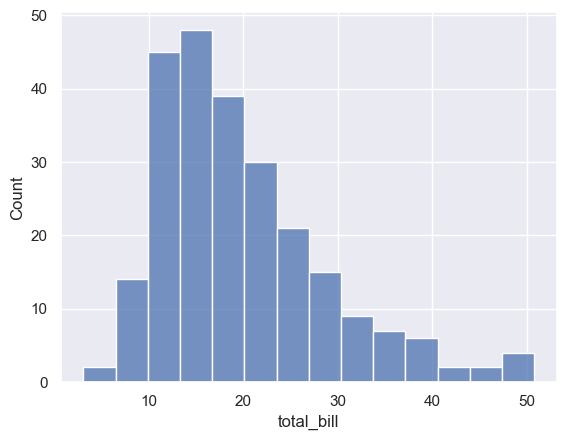

In [40]:
sns.histplot(data=tip_df['total_bill']);
plt.show()

In [29]:
tip_df["total_bill"].value_counts().sort_values(ascending=False)
#hmm có vẻ không giống trong diag nhỉ 

total_bill
13.42    3
21.01    2
20.69    2
10.33    2
10.34    2
        ..
29.03    1
27.18    1
22.67    1
17.82    1
18.78    1
Name: count, Length: 229, dtype: int64

### KDE: 
* A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analagous to a histogram.
* KDE represents the data using a continuous probability density curve in one or more dimensions

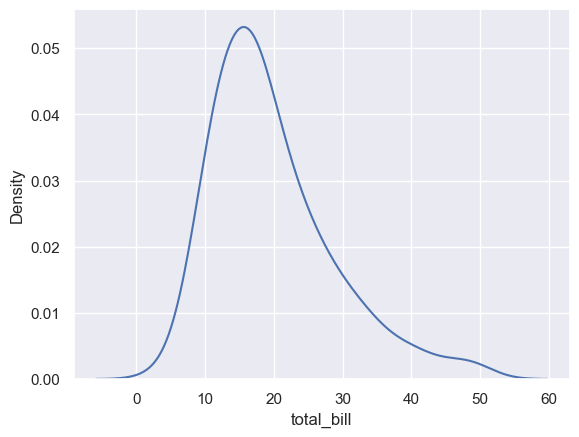

In [41]:
sns.kdeplot(data = tip_df["total_bill"])
plt.show()

### Displot
* Informative distributional summaries
* Requires knownledge about the distribution of vars in dataset
   

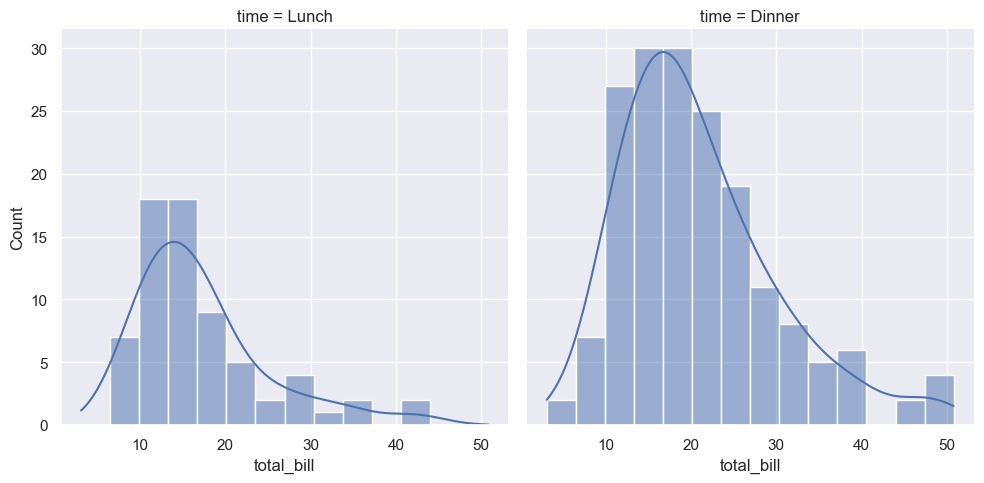

In [43]:
sns.displot(data = tip_df, x = "total_bill", col = "time", kde = True);
plt.show()

#trưa có xu hướng ăn rẻ hơn tối


### Categorical plots 
* Bar plot

In [45]:
tip_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


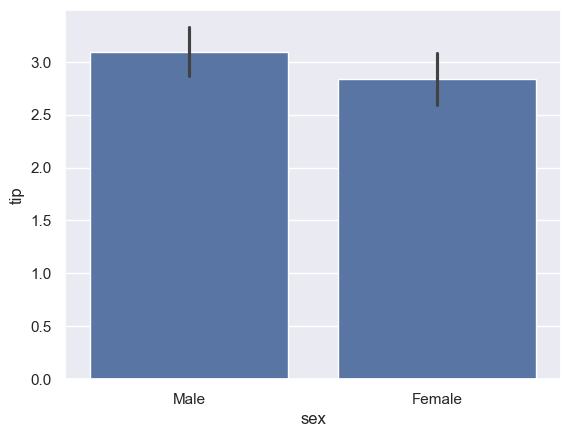

In [47]:
sns.barplot(data = tip_df, x = "sex", y = "tip", estimator = np.mean)
plt.show()
#nam trả tips cao hơn 

### Countplot

In [49]:
tip_df["sex"].value_counts()

sex
Male      157
Female     87
Name: count, dtype: int64

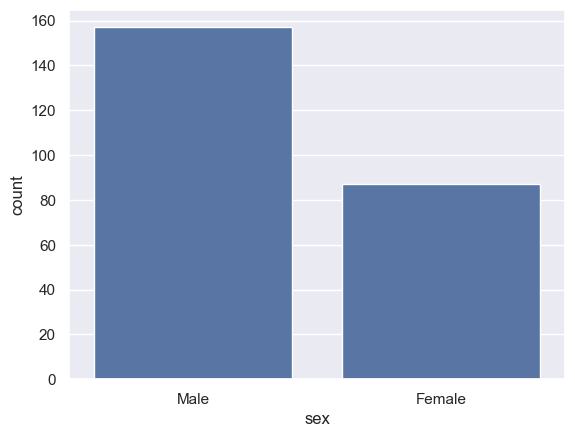

In [52]:
sns.countplot(data = tip_df, x = "sex")
plt.show()

### Box plot: Box Plot is a good indication of how the values in the data are spread out
* Identify outliers
* Check if data is symmetrical
* Determine how tightly data is grouped

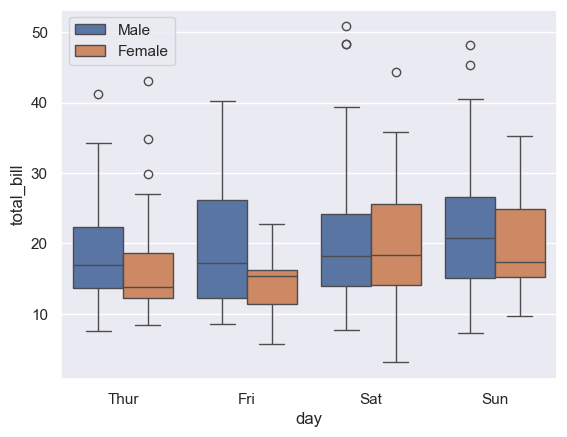

In [56]:
sns.boxplot(data = tip_df, x = "day", y = "total_bill", hue = "sex")
plt.legend(loc = 0)#palette : chinh mau
plt.show()

### Facet grid
* FacetGrid can be drawn with up to three dimensions: row, col, and hue.
* The main approach for visualizing data on this grid is with the FacetGrid.map() method.

In [58]:
tip_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


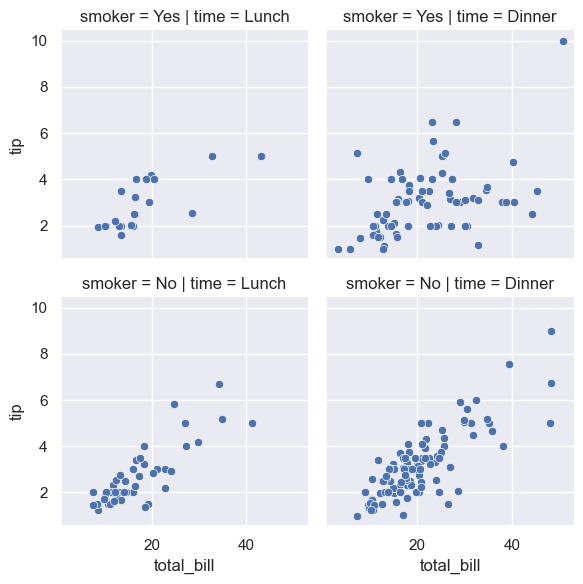

In [63]:
tip_fg = sns.FacetGrid(data = tip_df, row = "smoker", col = "time") #Create a class instance of Facet Grid class
tip_fg.map(sns.scatterplot, 'total_bill', 'tip') #Ox: total_bill, Oy = tip
plt.show()

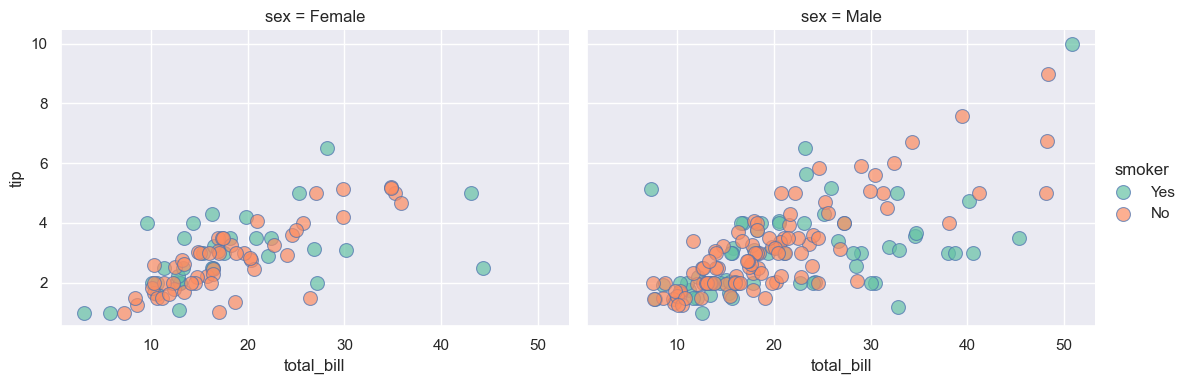

In [77]:
kws = dict( s = 100, edgecolor = "b", alpha = .7)
new_fg = sns.FacetGrid(data = tip_df, col = "sex", hue = "smoker",
                                  col_order = ["Female", "Male"], palette = "Set2", height = 4, aspect = 1.4)
new_fg.map(sns.scatterplot, 'total_bill', 'tip', **kws)
new_fg.add_legend()
plt.show()

### Joint Plot
* joint distribution between two variables along with each variable’s marginal distribution

In [79]:
penguins_df = sns.load_dataset("penguins")
penguins_df.head()
#bill_length: chiều dài mỏ, bill_depth: chiều rộng mỏ, flipper_length: tay

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


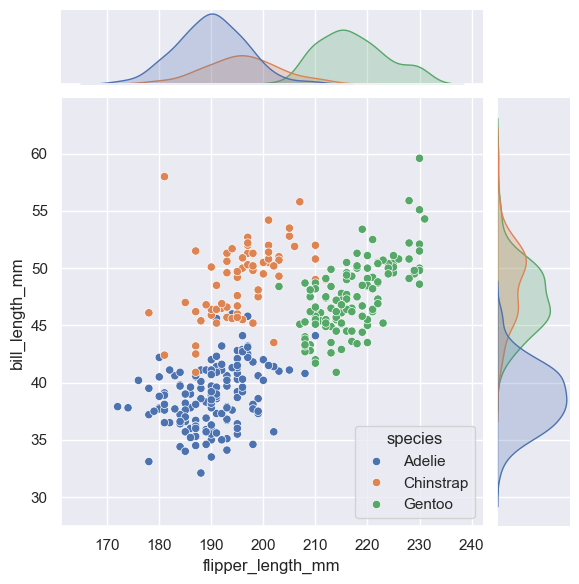

In [85]:
sns.jointplot(data = penguins_df, x = "flipper_length_mm", y = "bill_length_mm", hue = "species");
plt.show()

### Cánh ngắn mỏ ngắn, cánh dài, mỏ dài 

### Pair plot

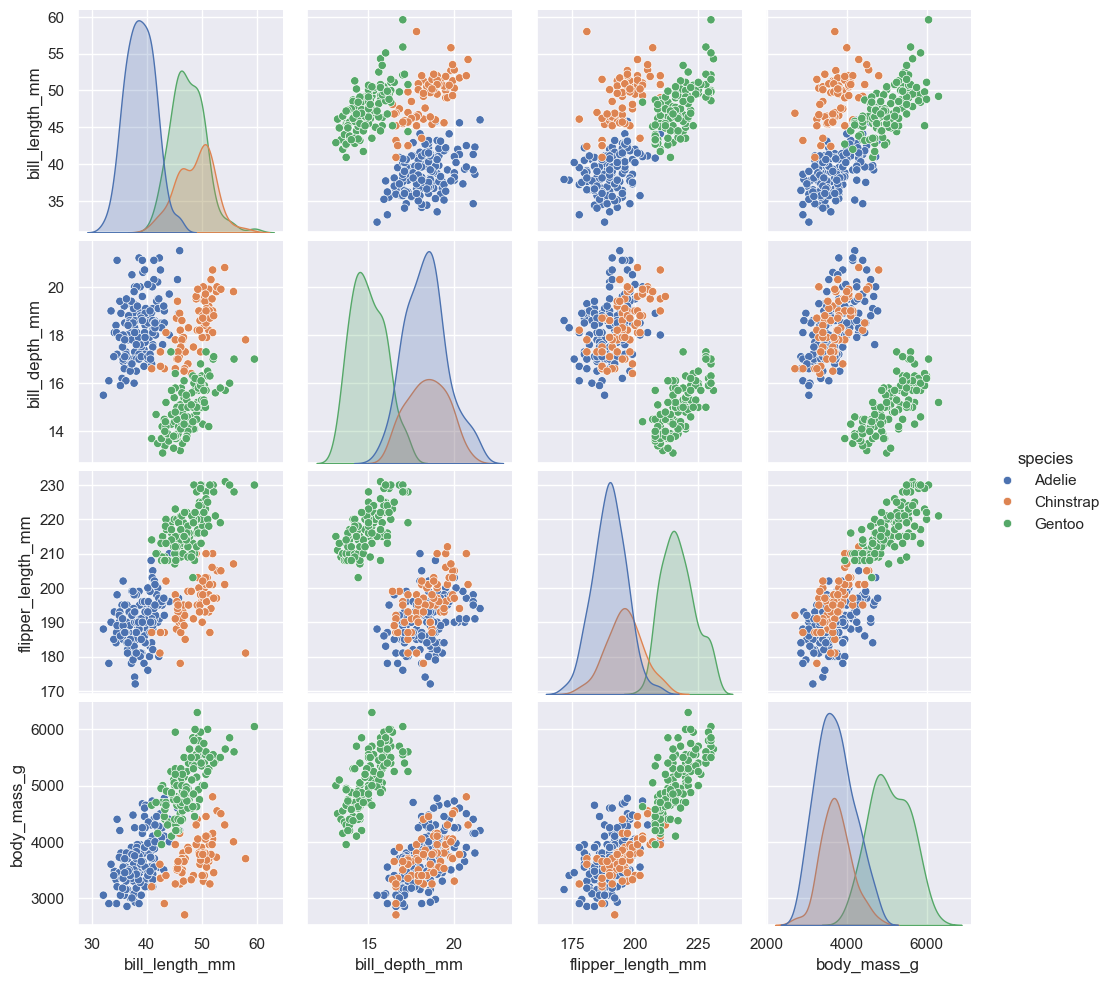

In [87]:
sns.pairplot(data = penguins_df, hue = "species")
plt.show()

### Heatmap 
* Describing density or intensity of variables, visualize patterns, variance, and even anomalies.

In [90]:
flights_df = sns.load_dataset("flights")
flights_df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [91]:
flights = pd.pivot_table(data = flights_df, index = "month", columns = "year", values = "passengers")

C:\Users\tuana\AppData\Local\Temp\ipykernel_18476\1864590383.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  flights = pd.pivot_table(data = flights_df, index = "month", columns = "year", values = "passengers")


In [93]:
flights

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112.0,115.0,145.0,171.0,196.0,204.0,242.0,284.0,315.0,340.0,360.0,417.0
Feb,118.0,126.0,150.0,180.0,196.0,188.0,233.0,277.0,301.0,318.0,342.0,391.0
Mar,132.0,141.0,178.0,193.0,236.0,235.0,267.0,317.0,356.0,362.0,406.0,419.0
Apr,129.0,135.0,163.0,181.0,235.0,227.0,269.0,313.0,348.0,348.0,396.0,461.0
May,121.0,125.0,172.0,183.0,229.0,234.0,270.0,318.0,355.0,363.0,420.0,472.0
Jun,135.0,149.0,178.0,218.0,243.0,264.0,315.0,374.0,422.0,435.0,472.0,535.0
Jul,148.0,170.0,199.0,230.0,264.0,302.0,364.0,413.0,465.0,491.0,548.0,622.0
Aug,148.0,170.0,199.0,242.0,272.0,293.0,347.0,405.0,467.0,505.0,559.0,606.0
Sep,136.0,158.0,184.0,209.0,237.0,259.0,312.0,355.0,404.0,404.0,463.0,508.0


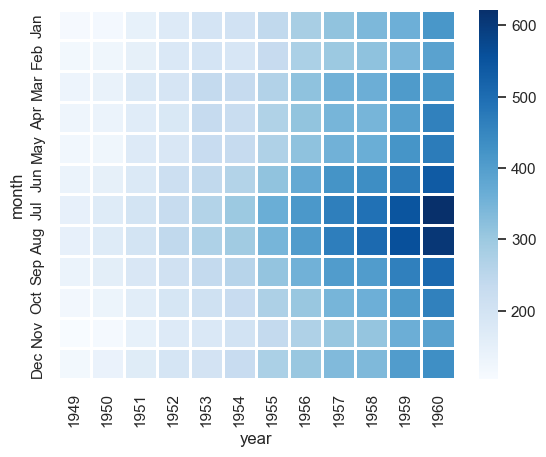

In [99]:
sns.heatmap(data = flights, cmap = "Blues", linecolor = "White", linewidth = 1)
plt.show()

#### Project: Nutrition Data Visualisation on 80 cereal products
### Link: https://www.kaggle.com/crawford/80-cereals

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
#read data
cereal_df = pd.read_csv("cereal.csv")
cereal_df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


# Lets drop irrelevant fields


In [117]:
fields = ['name', 'shelf', 'weight', 'cups', 'rating', 'mfr', 'type']
cereal_df_new = cereal_df.drop(fields, axis = 1) #mắc định: axis = 0: xóa hàng, axis = 1 xóa cột
cereal_df_new

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
0,70,4,1,130,10.0,5.0,6,280,25
1,120,3,5,15,2.0,8.0,8,135,0
2,70,4,1,260,9.0,7.0,5,320,25
3,50,4,0,140,14.0,8.0,0,330,25
4,110,2,2,200,1.0,14.0,8,-1,25
...,...,...,...,...,...,...,...,...,...
72,110,2,1,250,0.0,21.0,3,60,25
73,110,1,1,140,0.0,13.0,12,25,25
74,100,3,1,230,3.0,17.0,3,115,25
75,100,3,1,200,3.0,17.0,3,110,25


In [118]:
# corr(): là một phép toán sẽ nhân các ma trận giữa hàm lượng dinh dưỡng lại với nhau, chỉ nhận các cột có giá trị là numerical 
cereal_corr = cereal_df_new.corr() #get correlation data
cereal_corr

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
calories,1.000000,0.019066,0.498610,0.300649,-0.293413,0.250681,0.562340,-0.066609,0.265356
protein,0.019066,1.000000,0.208431,-0.054674,0.500330,-0.130864,-0.329142,0.549407,0.007335
fat,0.498610,0.208431,1.000000,-0.005407,0.016719,-0.318043,0.270819,0.193279,-0.031156
sodium,0.300649,-0.054674,-0.005407,1.000000,-0.070675,0.355983,0.101451,-0.032603,0.361477
fiber,-0.293413,0.500330,0.016719,-0.070675,1.000000,-0.356083,-0.141205,0.903374,-0.032243
carbo,0.250681,-0.130864,-0.318043,0.355983,-0.356083,1.000000,-0.331665,-0.349685,0.258148
sugars,0.562340,-0.329142,0.270819,0.101451,-0.141205,-0.331665,1.000000,0.021696,0.125137
potass,-0.066609,0.549407,0.193279,-0.032603,0.903374,-0.349685,0.021696,1.000000,0.020699
vitamins,0.265356,0.007335,-0.031156,0.361477,-0.032243,0.258148,0.125137,0.020699,1.000000


### Using heatmap: Để ý là đây la ma trận đối xứng nên có thể bỏ 1 phần trên đường chéo của ma trận vì nó giống nhau

In [120]:
#ones_like in np can build a matrix of booleans (True, false) with the same shape of out data
ones_corr = np.ones_like(cereal_corr, dtype = bool)
ones_corr

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True]])

In [122]:
ones_corr.shape, cereal_corr.shape

((9, 9), (9, 9))

In [124]:
#np: triu: return upper triangle of matrix
mask = np.triu(ones_corr)
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True,  True],
       [False, False, False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False, False, False,  True]])

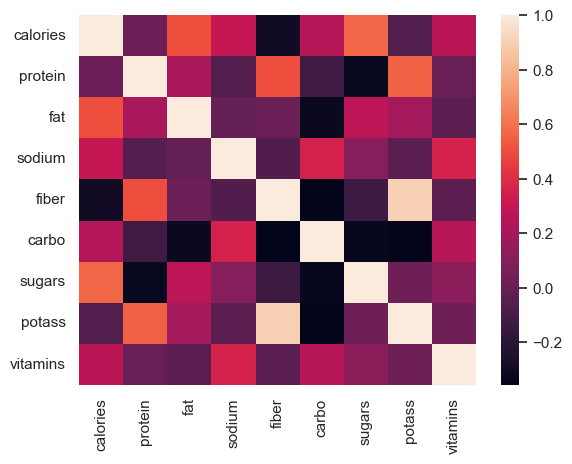

In [128]:
sns.heatmap(data = cereal_corr)
plt.show()

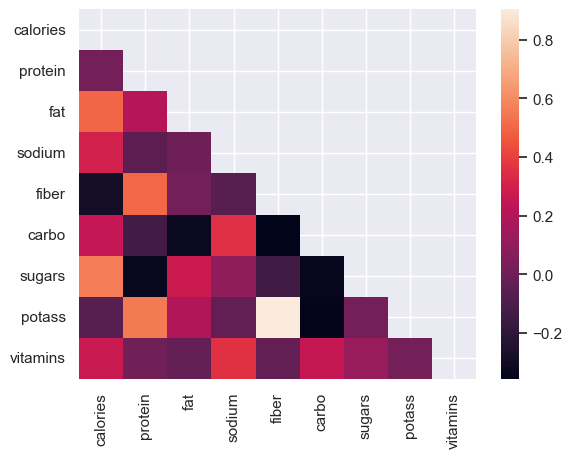

In [129]:
sns.heatmap(data = cereal_corr, mask = mask)
plt.show()

### When removing the upper triangle, there are still two empty cells in out matrix (cals and vitamin)

In [131]:
adjusted_mask = mask[1:, :-1] #lấy từ cột thứ 2 nhưng ko bao gồm cột cuối cùng
adjusted_mask

array([[False,  True,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False, False,  True],
       [False, False, False, False, False, False, False, False]])

In [134]:
adjust_cereal_corr = cereal_corr.iloc[1:, :-1]

C:\Users\tuana\AppData\Local\Temp\ipykernel_18476\942528958.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(yticks, rotation = 0, fontsize = 13)
C:\Users\tuana\AppData\Local\Temp\ipykernel_18476\942528958.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xticks, rotation = 0, fontsize = 13)


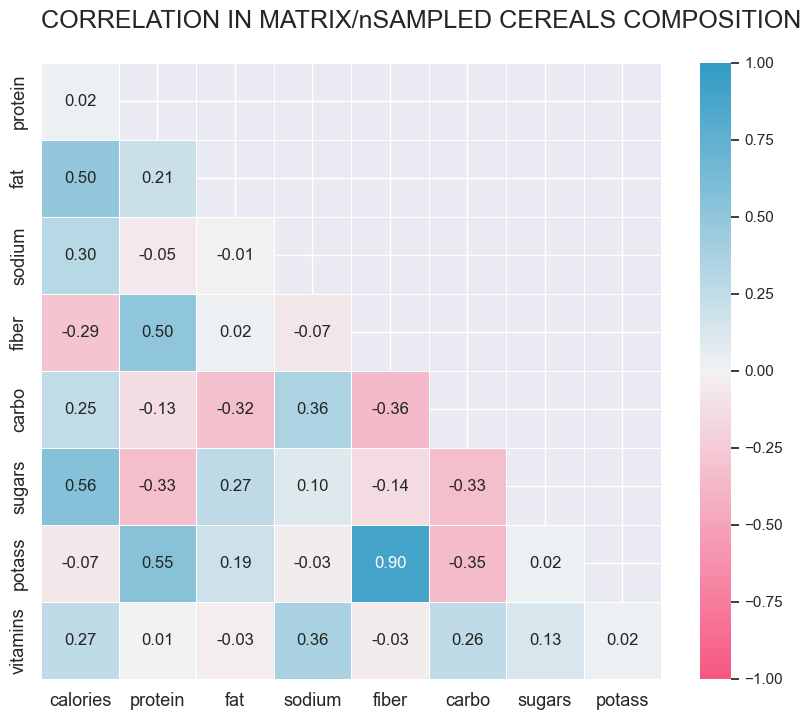

In [152]:
#using OO API in plt
fig,ax = plt.subplots(figsize = (10, 8))

#That method uses HUSL colors, so you need hue, saturation, and lightness. 
#I used hsluv.org to select the colors of this chart.
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)

#list_comprehension
yticks = [i.upper() for i in adjust_cereal_corr.index] #index LÀ CÁC Y LABELS, COLUMNS LÀ CÁC X LABELS 
xticks = [i.upper() for i in adjust_cereal_corr.columns]
ax.set_yticklabels(yticks, rotation = 0, fontsize = 13)
ax.set_xticklabels(xticks, rotation = 0, fontsize = 13)

title = "CORRELATION IN MATRIX/nSAMPLED CEREALS COMPOSITION\n"
ax.set_title(title, loc = 'left', fontsize = 18)

sns.heatmap(data = adjust_cereal_corr ,mask = adjusted_mask, 
           annot = True, fmt = ".2f",  cmap = cmap, vmin = -1, vmax = 1, linecolor = "white", linewidths = 0.5)
plt.show()